<div style="text-align: center; font-size: 25pt"> Homework 6 </div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight') # Use plt.style.available to see more styles
sns.set()
%matplotlib inline

# world bank data

## Loading the data

Let us load some World Bank data into a `pd.DataFrame` object named ```wb```.

In [2]:
wb = pd.read_csv("./data/world_bank_misc.csv", index_col=0)
wb.head()

,Primary completion rate: Male: % of relevant age group: 2015,Primary completion rate: Female: % of relevant age group: 2015,Lower secondary completion rate: Male: % of relevant age group: 2015,Lower secondary completion rate: Female: % of relevant age group: 2015,Youth literacy rate: Male: % of ages 15-24: 2005-14,Youth literacy rate: Female: % of ages 15-24: 2005-14,Adult literacy rate: Male: % ages 15 and older: 2005-14,Adult literacy rate: Female: % ages 15 and older: 2005-14,Students at lowest proficiency on PISA: Mathematics: % of 15 year-olds: 2015,Students at lowest proficiency on PISA: Reading: % of 15 year-olds: 2015,...,Access to improved sanitation facilities: % of population: 1990,Access to improved sanitation facilities: % of population: 2015,Child immunization rate: Measles: % of children ages 12-23 months: 2015,Child immunization rate: DTP3: % of children ages 12-23 months: 2015,Children with acute respiratory infection taken to health provider: % of children under age 5 with ARI: 2009-2016,Children with diarrhea who received oral rehydration and continuous feeding: % of children under age 5 with diarrhea: 2009-2016,Children sleeping under treated bed nets: % of children under age 5: 2009-2016,Children with fever receiving antimalarial drugs: % of children under age 5 with fever: 2009-2016,Tuberculosis: Treatment success rate: % of new cases: 2014,Tuberculosis: Cases detection rate: % of new estimated cases: 2015
Afghanistan,NaN,NaN,NaN,NaN,62.0,32.0,45.0,18.0,NaN,NaN,...,21.0,32.0,68.0,78.0,62.0,41.0,4.6,11.8,87.0,58.0
Albania,108.0,105.0,97.0,97.0,99.0,99.0,98.0,96.0,26.0,7.0,...,78.0,93.0,98.0,98.0,70.0,63.0,NaN,NaN,88.0,76.0
Algeria,106.0,105.0,68.0,85.0,96.0,92.0,83.0,68.0,51.0,11.0,...,80.0,88.0,95.0,95.0,66.0,42.0,NaN,NaN,88.0,80.0
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,61.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.0
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,100.0,96.0,97.0,NaN,NaN,NaN,NaN,83.0,87.0


This table contains some interesting columns:

In [4]:
list(wb.columns)

['Primary completion rate: Male: % of relevant age group: 2015',
 'Primary completion rate: Female: % of relevant age group: 2015',
 'Lower secondary completion rate: Male: % of relevant age group: 2015',
 'Lower secondary completion rate: Female: % of relevant age group: 2015',
 'Youth literacy rate: Male: % of ages 15-24: 2005-14',
 'Youth literacy rate: Female: % of ages 15-24: 2005-14',
 'Adult literacy rate: Male: % ages 15 and older: 2005-14',
 'Adult literacy rate: Female: % ages 15 and older: 2005-14',
 'Students at lowest proficiency on PISA: Mathematics: % of 15 year-olds: 2015',
 'Students at lowest proficiency on PISA: Reading: % of 15 year-olds: 2015',
 'Students at lowest proficiency on PISA: Science: % of 15 year-olds: 2015',
 'Population: millions: 2016',
 'Surface area: sq. km thousands: 2016',
 'Population density: people per sq. km: 2016',
 'Gross national income, Atlas method: $ billions: 2016',
 'Gross national income per capita, Atlas method: $: 2016',
 'Purchasin

## Scaling

At first, let's create a DataFrame with the ``Adult literacy rate`` and the ``Gross national income per capita``:

In [5]:
#creates a DataFrame with the appropriate index
df = pd.DataFrame(index=wb.index)

#copies the Series we want
df['lit'] = wb['Adult literacy rate: Female: % ages 15 and older: 2005-14']
df['inc'] = wb['Gross national income per capita, Atlas method: $: 2016']

#the line below drops all records that have a NaN value in either column
df.dropna(inplace=True)
print("Original records:", len(wb))
print("Final records:", len(df))
df.head(5)

Original records: 216
Final records: 147


,lit,inc
Afghanistan,18.0,580.0
Albania,96.0,4250.0
Algeria,68.0,4270.0
Angola,60.0,3440.0
Antigua and Barbuda,99.0,13400.0


<font color='red'>**Question:**</font> Suppose we wanted to build a histogram of the distribution of literacy rates (i.e. ``df["lit"]``). 

Text(0.5, 1.0, 'World Bank Female Adult Literacy Rate')

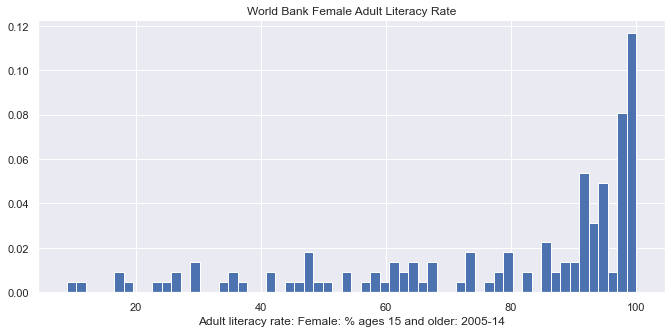

In [7]:
plt.figure(figsize=(10,5))
plt.subplot(1,1,1)

# you can insert your code here:
plt.hist(df["lit"], bins = 60, density=True, ec='w');
#
plt.xlabel("Adult literacy rate: Female: % ages 15 and older: 2005-14")
plt.title('World Bank Female Adult Literacy Rate')

<font color='red'>**Question:**</font> In the cell below, create a plot of income per capita using the [`displot`](https://seaborn.pydata.org/generated/seaborn.displot.html) function. When you call `displot`, set the `kde` parameter to false, e.g. `displot(s, kde=False)`.

Don't forget to title the plot and label axes!

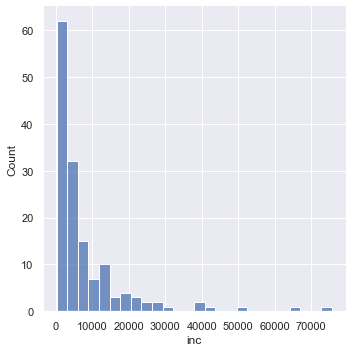

In [8]:
# your code here
sns.displot(df["inc"], kde=False);

You should see histograms that show the counts of how many data points appear in each bin. `distplot` uses a heuristic called the Freedman-Diaconis rule to automatically identify the best bin sizes, though it is possible to set the bins yourself.


<font color='red'>**Question:**</font> In the cell below, set the `rug` parameter to True  in `displot` with the same plot function.

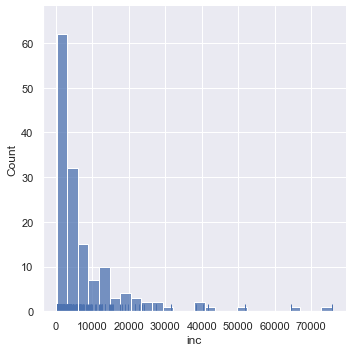

In [10]:
# your code here
sns.displot(df["inc"] ,rug=True);

Above, you should see little lines at the bottom of the plot showing the actual data points. 

<font color='red'>**Question:**</font> In the cell below, further set the `kde` parameter to True in your `displot` to see what happens:

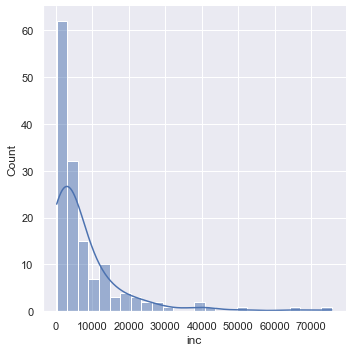

In [11]:
# your code here
sns.displot(df["inc"], kde=True);

<font color='red'>**Question:**</font> Transforming the `inc` data logarithmically gives us a more symmetric distribution of values. This can make it easier to see patterns.

In the cell below, make a distribution plot of `inc` with the data transformed using `np.log10` and `kde=True`. If you want to see the exact counts, just set `kde=False`. If you don't specify the `kde` parameter, it is by default set to True. 

Don't forget to set the labels and title.

Text(0.5, 1.0, 'Gross National Income Per Capita Count ')

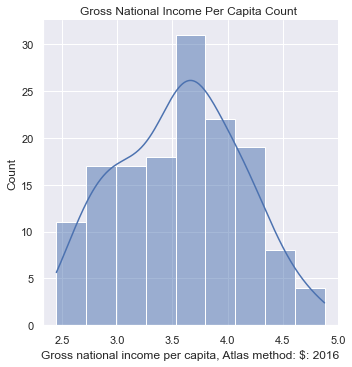

In [12]:
# your code here
sns.displot(np.log10(df["inc"]), kde=True);
plt.xlabel('Gross national income per capita, Atlas method: $: 2016')
plt.title('Gross National Income Per Capita Count ')

<font color='red'>**Question:**</font> If we want to examine the relationship between the female adult literacy rate and the gross national income per capita, we need to make a scatter plot. 

In the cell below, create a scatter plot of untransformed income per capita and literacy rate using the `sns.scatterplot` function. Make  sure to label both axes.

Text(0, 0.5, 'the gross national income per capita')

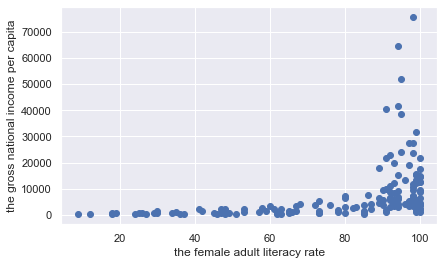

In [13]:
# your code here
plt.scatter(data=df, x='lit', y='inc')
plt.xlabel('the female adult literacy rate')
plt.ylabel('the gross national income per capita')

<font color='red'>**Question:**</font>  In the cell below, make a scatter plot of log-transformed income per capita against literacy rate to better assess the relationship.


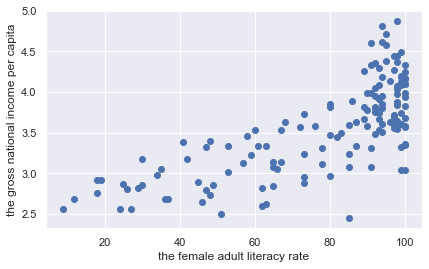

In [14]:
# your code here
df['inc in log'] = np.log10(df["inc"])
plt.scatter(data=df, x='lit', y='inc in log')
plt.xlabel('the female adult literacy rate')
plt.ylabel('the gross national income per capita')
del df['inc in log']

# bike sharing data

## load and understand the Data

Bike sharing systems are a new generation of traditional bike rentals where the process of signing up, renting and returning is automated. Through these systems, users are able to easily rent a bike from one location and return them to another. 

The variables in this data frame are defined as:

Variable       | Description
-------------- | ------------------------------------------------------------------
instant | record index
dteday | date
season | 1. spring <br> 2. summer <br> 3. fall <br> 4. winter
yr | year (0: 2011, 1:2012)
mnth | month ( 1 to 12)
hr | hour (0 to 23)
holiday | whether day is holiday or not
weekday | day of the week
workingday | if day is neither weekend nor holiday
weathersit | 1. clear or partly cloudy <br> 2. mist and clouds <br> 3. light snow or rain <br> 4. heavy rain or snow
temp | normalized temperature in Celsius (divided by 41)
atemp | normalized "feels-like" temperature in Celsius (divided by 50)
hum | normalized percent humidity (divided by 100)
windspeed| normalized wind speed (divided by 67)
casual | count of casual users
registered | count of registered users
cnt | count of total rental bikes including casual and registered  

***The data is a .zip file in csv format, we can use pandas to read the compressed data by setting the compression="zip":***

In [18]:
# Run this cell to load the data.  No further action is needed
bike = pd.read_csv('./data/bikeshare.zip', compression="zip")
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Data Preparation
A few of the variables that are numeric/integer actually encode categorical data. These include `holiday`, `weekday`, `workingday`, and `weathersit`. In the following problem, we will convert these four variables to strings specifying the categories. In particular, use 3-letter labels (`Sun`, `Mon`, `Tue`, `Wed`, `Thu`, `Fri`, and `Sat`) for `weekday`. You may simply use `yes`/`no` for `holiday` and `workingday`. 

<font color='red'>**Question:**</font>   Decoding `weekday`, `holiday`,  `workingday`, and `weathersit`

Decode the `holiday`, `weekday`, `workingday`, and `weathersit` fields:

1. `holiday`: Convert to `yes` and `no`.  Hint: There are fewer holidays...
1. `weekday`: It turns out that Monday is the day with the most holidays.  Mutate the `'weekday'` column to use the 3-letter label (`'Sun'`, `'Mon'`, `'Tue'`, `'Wed'`, `'Thu'`, `'Fri'`, and `'Sat'` ...) instead of its current numerical values. Assume `0` corresponds to `Sun`, `1` to `Mon` and so on.
1. `workingday`: Convert to `yes` and `no`.
1. `weathersit`: You should replace each value with one of `Clear`, `Mist`, `Light`, or `Heavy`. Assume `1` corresponds to `Clear`, `2` corresponds to `Mist`, ... `4` for `Heavy`.

In [19]:
# your code here
bike['holiday'] = bike.loc[:,"holiday"].map({ 1:'yes', 0:'no'})
bike['weekday'] = bike.loc[:,'weekday'].map({0:'Sun',1:'Mon',2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})
bike['workingday'] = bike.loc[:,'workingday'].map({1:'yes', 0:'no'})
bike['weathersit'] = bike.loc[:,'weathersit'].map({1:'Clear',2:'Mist',3:'Light',4:'Heavy'})
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,no,Sat,no,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,0,1,1


## Exploring the Distribution of Riders

<font color='red'>**Question:**</font>  Use the `sns.displot` function to create a plot that overlays the distribution of the daily counts of bike users, using blue to represent `casual` riders, and green to represent `registered` riders. 

Include a legend, xlabel, ylabel, and title. Read the [seaborn plotting tutorial](https://seaborn.pydata.org/tutorial/distributions.html) if you're not sure how to add these.

<img src='images/casual_v_registered.png' width="500px" />

Text(0.5, 0, 'Rider Count')

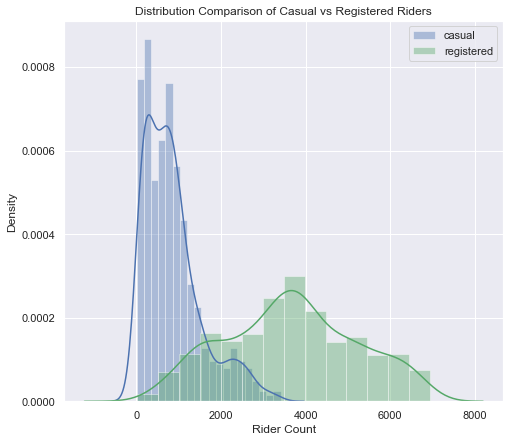

In [20]:
time = bike['dteday'].unique()
list_casual = []
list_registered = []
list_time = []
for i in time:
    a = bike[bike['dteday'] == i]['casual'].sum()
    b = bike[bike['dteday'] == i]['registered'].sum()
    list_casual.append(a)
    list_registered.append(b)
    list_time.append(i)
data = [list_casual,list_registered]
df1=pd.DataFrame(list_casual,index=list_time,columns=['casual'])
df2 = pd.DataFrame(list_registered,index = list_time,columns = ['registered'])
df = pd.concat([df1,df2],axis = 1)
plt.figure(figsize = (7,7))
sns.distplot(df['casual'],label = 'casual')
sns.distplot(df['registered'],label = "registered",color = 'g')
plt.legend()
plt.title("Distribution Comparison of Casual vs Registered Riders")
plt.xlabel('Rider Count')

<font color='red'>**Question:**</font>  The density plots do not show us how the counts for registered and casual riders vary together. Use [`sns.lmplot`](https://seaborn.pydata.org/generated/seaborn.lmplot.html) to make a scatter plot to investigate the relationship between casual and registered counts. This time, let's use the `bike` DataFrame to plot hourly counts instead of daily counts.

There are many points in the scatter plot, so make them small to help reduce overplotting. Also make sure to set `fit_reg=True` to generate the linear regression line. You can set the `height` parameter if you want to adjust the size of the `lmplot`. 

<img src='images/casual_registered_working_nonworking.png' width="500px" />

(-50.0, 400.0)

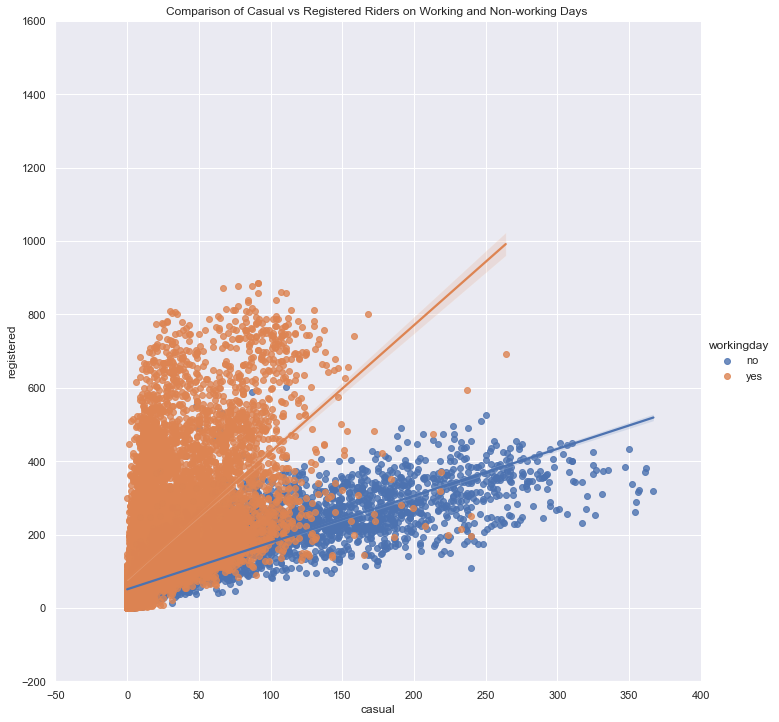

In [21]:
# Make the font size a bit bigger
sns.set(font_scale=1)
# your code here
sns.lmplot(data = bike, x = 'casual', y = 'registered', hue = 'workingday',height =10,fit_reg=True) # 线性回归
plt.title('Comparison of Casual vs Registered Riders on Working and Non-working Days ')
plt.ylim(-200,1600)
plt.xlim(-50,400)

***Bivariate Kernel Density Plot***
 
To address overplotting, let's try visualizing the data with another technique, the bivariate kernel density estimate.

You will want to read up on the documentation for `sns.kdeplot`, which can be found [here](https://seaborn.pydata.org/generated/seaborn.kdeplot.html).

The result we wish to achieve should be a plot that looks like this:

<img src='images/bivariate_kde_of_daily_rider_types.png' width="500px" />

A basic kde plot of all the data is quite easy to generate. However, this plot includes both weekend and weekday data, which isn't what we want.

<font color='red'>**Question:**</font>  Generating the plot with weekend and weekday separated can be complicated so we will provide a walkthrough below, feel free to use whatever method you wish if you do not want to follow the walkthrough.

After you get your plot working, experiment by setting `shade=True` in `kdeplot` to see the difference between the shaded and unshaded version. Please submit your work with `shade=False`. 

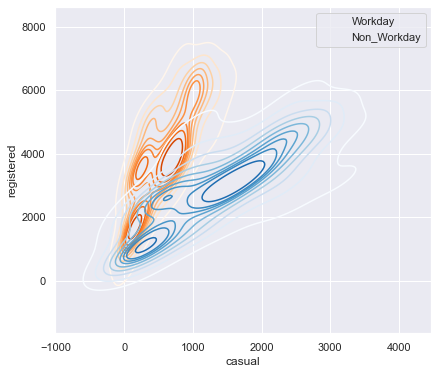

In [26]:
plt.figure(figsize=(6,6))
a = []
for i in list_time:
    a.append(bike[bike['dteday'] == i]['workingday'].values[0])
    #print(bike[bike['dteday'] == i]['workingday'].values[0])
df['Workday'] = a
df
isworkday = df[df['Workday'] == 'yes']
notworkday = df[df['Workday'] == 'no']
sns.kdeplot(data = isworkday ,x = 'casual', y = 'registered',shade = False,cmap="Oranges",label = 'Workday')
sns.kdeplot(data = notworkday ,x = 'casual', y = 'registered',shade = False,cmap="Blues",label = 'Non_Workday')
plt.legend()

In [177]:
# Set the figure size for the plot
plt.figure(figsize=(12,8))

# Set 'is_workingday' to a boolean array that is true for all working_days
is_workingday = ...

# Bivariate KDEs require two data inputs. 
# In this case, we will need the daily counts for casual and registered riders on workdays
# Hint: consider using the .loc method here.
casual_workday = ...
registered_workday = ...

# Use sns.kdeplot on the two variables above to plot the bivariate KDE for weekday rides
...

not_workingday = ...
# Repeat the same steps above but for rows corresponding to non-workingdays
# Hint: Again, consider using the .loc method here.
casual_non_workday = ...
registered_non_workday = ...

# Use sns.kdeplot on the two variables above to plot the bivariate KDE for non-workingday rides
...

...

Ellipsis

<Figure size 864x576 with 0 Axes>

<font color='red'>**Question:**</font>  ***Joint Plot***

As an alternative approach to visualizing the data, construct the following set of three plots where the main plot shows the contours of the kernel density estimate of daily counts for registered and casual riders plotted together, and the two "margin" plots (at the top and right of the figure) provide the univariate kernel density estimate of each of these variables. Note that this plot makes it harder see the linear relationships between casual and registered for the two different conditions (weekday vs. weekend).

<img src="images/joint_distribution_of_daily_rider_types.png" width="500px" />

**Hints**:
* The [seaborn plotting tutorial](https://seaborn.pydata.org/tutorial/distributions.html) has examples that may be helpful.
* Take a look at `sns.jointplot` and its `kind` parameter.
* `set_axis_labels` can be used to rename axes on the contour plot.

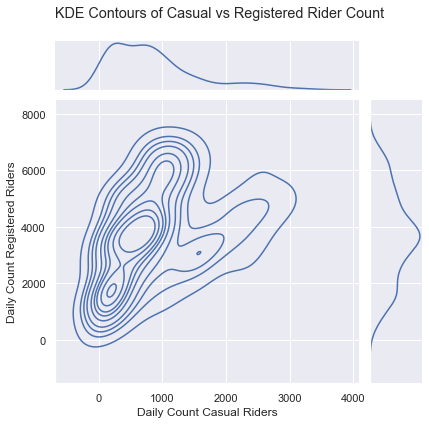

In [204]:
# your code here
ax = sns.jointplot(data=df,x="casual", y="registered", kind="kde")
ax.set_axis_labels(xlabel='Daily Count Casual Riders', ylabel='Daily Count Registered Riders')
plt.suptitle("KDE Contours of Casual vs Registered Rider Count")
plt.subplots_adjust(top=0.9);

***Exploring Ride Sharing and Weather***

Now let's examine how the weather is affecting rider's behavior. First let's look at how the proportion of casual riders changes as weather changes.

<font color='red'>**Question:**</font>  Create a new column `prop_casual` in the `bike` DataFrame representing the proportion of casual riders out of all riders for each record.

In [206]:
# your code here
bike['prop_casual'] = bike['casual'].values/(bike['casual'].values + bike['registered'])
bike

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,prop_casual
0,1,2011-01-01,1,0,1,0,no,Sat,no,Clear,0.24,0.2879,0.81,0.0000,3,13,16,0.187500
1,2,2011-01-01,1,0,1,1,no,Sat,no,Clear,0.22,0.2727,0.80,0.0000,8,32,40,0.200000
2,3,2011-01-01,1,0,1,2,no,Sat,no,Clear,0.22,0.2727,0.80,0.0000,5,27,32,0.156250
3,4,2011-01-01,1,0,1,3,no,Sat,no,Clear,0.24,0.2879,0.75,0.0000,3,10,13,0.230769
4,5,2011-01-01,1,0,1,4,no,Sat,no,Clear,0.24,0.2879,0.75,0.0000,0,1,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,no,Mon,yes,Mist,0.26,0.2576,0.60,0.1642,11,108,119,0.092437
17375,17376,2012-12-31,1,1,12,20,no,Mon,yes,Mist,0.26,0.2576,0.60,0.1642,8,81,89,0.089888
17376,17377,2012-12-31,1,1,12,21,no,Mon,yes,Clear,0.26,0.2576,0.60,0.1642,7,83,90,0.077778
17377,17378,2012-12-31,1,1,12,22,no,Mon,yes,Clear,0.26,0.2727,0.56,0.1343,13,48,61,0.213115


<font color='red'>**Question:**</font>  In order to examine the relationship between proportion of casual riders and temperature, we can create a scatterplot using [`sns.scatterplot`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html). We can even use color/hue to encode the information about day of week. Run the cell below, and you'll see we end up with a big mess that is impossible to interpret.

**Hint**: You will need to set the `data`, `x`, `y`, and `hue` in the `sns.scatterplot` call.

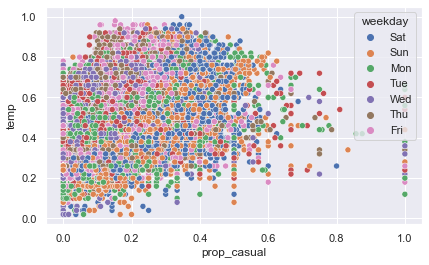

In [214]:
# your code here
sns.scatterplot(data = bike, x = 'prop_casual', y = 'temp', hue = 'weekday');

# The End